# Import

In [1]:
# package
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import sequence

import tensorflow as tf
tf.random.set_seed(1111)
tf.keras.utils.set_random_seed(1111)

# dataset packagea
from tensorflow.keras.datasets import imdb

# metrcis
from sklearn.metrics import accuracy_score, classification_report

# ETC
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

# SimpleRNN-Model

In [2]:
def loss_compare(history):
    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.legend()
    plt.show()
    print("="*40)
    print("Training loss: ", history.history['loss'][-1])
    print("Validation loss: ", history.history['val_loss'][-1])
    print("="*40)


def Simple_RNN(config, X, y):
    model = Sequential()
    model.add(Embedding(config.vocab_size, config.em_output))
    model.add(SimpleRNN(config.rnn_node1, return_sequences=True))
    model.add(Dropout(config.drop_out_rate))
    model.add(SimpleRNN(config.rnn_node2, return_sequences=False))
    model.add(Dropout(config.drop_out_rate))
    model.add(Dense(1, activation='sigmoid'))


    optimizer = Adam(learning_rate=config.learning_rate)
    model.compile(optimizer=optimizer, 
                    loss='binary_crossentropy')
    
    early_stopping = EarlyStopping(
        monitor='val_loss',    
        patience=config.patience,           
        verbose=0,             
        restore_best_weights=True 
    )
    
    history = model.fit(X, y, 
                        epochs=config.epochs, 
                        batch_size=config.batch_size,
                        validation_split=config.validation_split, 
                        callbacks=[early_stopping])

    model.summary()

    loss_compare(history)
    return model


# Hyperparameter config

In [3]:
class config():
    def __init__(self, vocab_size, em_output, rnn_node1, rnn_node2, drop_out_rate=0.5, learning_rate=0.001, patience_ratio=0.2, epochs=100, 
                 validation_split=0.2, batch_size = 128):
        
        self.vocab_size = vocab_size
        self.em_output = em_output

        self.rnn_node1 = rnn_node1
        self.rnn_node2 =rnn_node2
        self.drop_out_rate =drop_out_rate
        self.learning_rate = learning_rate
        self.patience = epochs * patience_ratio
        self.batch_size = batch_size
        self.epochs = epochs
        self.validation_split = validation_split

        self.info = {"vocab_size": vocab_size,
                     "em_output": em_output,
                     "rnn_node1": rnn_node1,
                     "rnn_node2": rnn_node2,
                     "drop_out_rate": drop_out_rate,
                     "learning_rate": learning_rate,
                     "patience": self.patience,
                     "epochs": epochs,
                     "batch_size": batch_size,
                     "validation_split": validation_split,
                     }

    def get_hyperparameter(self):
        for k, v in self.info.items():
            print(f"{k}: {v}")

# Dataset

In [4]:
max_len = 200
vocab_size = 10000
batch_size = 200

In [5]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)
X_train = sequence.pad_sequences(X_train, maxlen=max_len)
y_train = np.array(y_train)

X_test = sequence.pad_sequences(X_test, maxlen=max_len)
y_test = np.array(y_test)

In [6]:
print(f"train shape: {X_train.shape}")
print(f"valid shape: {X_test.shape}")

(25000, 200)

# Model

In [7]:
rnn_config = config(vocab_size=vocab_size,
                    em_output=32,
                    rnn_node1=256,
                    rnn_node2=256,
                    drop_out_rate=0.5,
                    learning_rate=0.001,
                    patience_ratio=0.3,
                    epochs=100,
                    batch_size=batch_size,
                    validation_split=0.2)

Epoch 1/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 26s 303ms/step - loss: 0.8304 - val_loss: 0.6953
Epoch 2/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 23s 297ms/step - loss: 0.7893 - val_loss: 0.6955
Epoch 3/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 24s 299ms/step - loss: 0.7553 - val_loss: 0.7012
Epoch 4/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 24s 299ms/step - loss: 0.7352 - val_loss: 0.6984
Epoch 5/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 24s 305ms/step - loss: 0.7186 - val_loss: 0.6939
Epoch 6/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 24s 308ms/step - loss: 0.7072 - val_loss: 0.6934
Epoch 7/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 24s 308ms/step - loss: 0.7026 - val_loss: 0.6977
Epoch 8/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 24s 307ms/step - loss: 0.6989 - val_loss: 0.6986
Epoch 9/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 24s 306ms/step - loss: 0.6968 - val_loss: 0.6994
Epoch 10/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 24s 305ms/step - loss: 0.6948 - val_loss: 0.6984
Epoch 11/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 24s 307ms/step - loss: 0.6965 - val_loss: 0.6996
Epoch 12/100
79/79 ━━━━━━━━━━━

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 32)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 200, 256)       │        73,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 200, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,576,709 (6.01 MB)

 Trainable params: 525,569 (2.00 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,051,140 (4.01 MB)

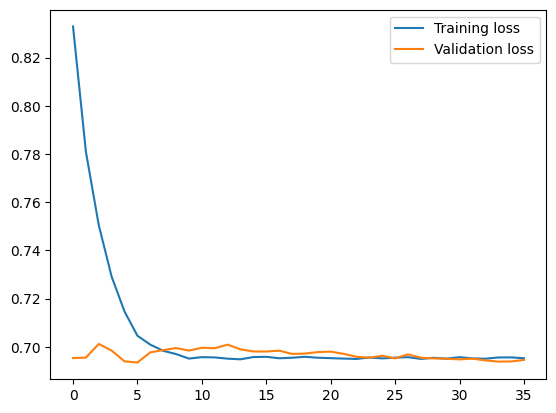

Training loss:  0.6952133774757385
Validation loss:  0.6945027709007263


In [8]:
rnn = Simple_RNN(rnn_config, X_train, y_train)

In [9]:
pred = rnn.predict(X_test)

pred = (pred > 0.5).astype(np.int8).reshape(-1,)

782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step


In [10]:
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [11]:
y_test

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

# Evaluation

In [12]:
accuracy_score(y_test, pred)

0.50084

In [13]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.50      0.83      0.62     12500
           1       0.50      0.17      0.26     12500

    accuracy                           0.50     25000
   macro avg       0.50      0.50      0.44     25000
weighted avg       0.50      0.50      0.44     25000

